In [ ]:
# install necessary library
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 6.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import warnings
from statsmodels.tsa.arima.model import ARIMA
from copy import deepcopy as dc
from sklearn.metrics import mean_squared_error
from math import sqrt

plt.rcParams["font.family"] = "serif"
% matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Waseda/4.3 Inaba Zemi/Senior Thesis/Data/"
df = pd.read_csv(path +'df_master_final.csv', index_col='date')
df.index = pd.to_datetime(df.index)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ARIMA model

In [ ]:
stepwise_fit = auto_arima(df['Positive\_Rate'], trace=True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-5925.998, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5374.149, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5845.193, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5660.458, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5374.943, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5922.415, Time=0.60 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5847.746, Time=0.90 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-5915.811, Time=1.46 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-5918.536, Time=1.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5910.821, Time=0.76 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-5921.974, Time=1.60 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-5916.764, Time=0.90 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-5918.602, Time=1.53 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-5927.680, Time=0.65 sec
 ARIMA(1,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  608
Model:               SARIMAX(2, 1, 2)   Log Likelihood                2968.840
Date:                Tue, 18 Jan 2022   AIC                          -5927.680
Time:                        03:24:00   BIC                          -5905.638
Sample:                             0   HQIC                         -5919.104
                                - 608                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4250      0.273      1.556      0.120      -0.110       0.960
ar.L2          0.4742      0.253      1.878      0.060      -0.021       0.969
ma.L1          0.0396      0.269      0.147      0.883      -0.488       0.568
ma.L2         -0.3405      0.137     -2.488      0.013      -0.609      -0.072
sigma2      3.297e-06   1.07e-07     30.752      0.000    3.09e-06    3.51e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7634.89
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                            -1.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 40 Days

In [ ]:
train40 = df.iloc[:-40]
test40 = df.iloc[-40:]
model = ARIMA(train40['Positive\_Rate'], order = (2, 1, 2))
model = model.fit()

In [ ]:
start = len(train40)
end  = len(df)
pred = model.predict(start=start, end=end-1, typ='levels')
pred.index = df.index[start:end+1]
df_pred = pd.DataFrame(pred)
df_pred = df_pred.rename(columns={'predicted_mean': 'Positive\_Rate'})

In [ ]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import warnings
from statsmodels.tsa.arima.model import ARIMA
from copy import deepcopy as dc
from sklearn.metrics import mean_squared_error
from math import sqrt
plt.rcParams["font.family"] = "serif"
% matplotlib inline
warnings.filterwarnings('ignore')

# Read data
df = pd.read_csv('df_master_final.csv', index_col='date')
df.index = pd.to_datetime(df.index)

# Calculate the lags using 'auto_arima' module
## Optimal lags will be calculated which minimizes the AIC
stepwise_fit = auto_arima(df['Positive\_Rate'], trace=True, suppress_warnings = True)
stepwise_fit.summary()

# 40 days prediction
## Split dataset
train40 = df.iloc[:-40]
test40 = df.iloc[-40:]
model = ARIMA(train40['Positive\_Rate'], order = (2, 1, 2))
model = model.fit()

## Make a prediction and store to a dataframe
start = len(train40)
end  = len(df)
pred = model.predict(start=start, end=end-1, typ='levels')
pred.index = df.index[start:end+1]
df_pred = pd.DataFrame(pred)
df_pred = df_pred.rename(columns={'predicted_mean': 'Positive\_Rate'})

# Make a line graph of the prediction
## Prepare the dataframes
df_plot = df[df.columns[0]]
df_pred_prev = pd.DataFrame(df_plot[-100:-40])
df_plot = pd.DataFrame(df_plot[-100:])
df_pred_plot = pd.concat([df_pred_prev, df_pred])

# Caclate the RMSE
rmse = sqrt(mean_squared_error(df_pred, test40['Positive\_Rate']))

## Generate graph
ax = df_plot.plot(figsize=(10,8), legend=True)
df_pred_plot.plot(ax=ax, figsize=(10,8), legend=True)
plt.xlabel('Timestamps')
plt.ylabel('Positive Rate')
plt.legend(['Predicted','Observed'])
### save figure
plt.savefig('ARIMA(2,1,2)_40Days.png', dpi=100)

In [ ]:
df_plot = df[df.columns[0]]
df_pred_prev = pd.DataFrame(df_plot[-100:-40])
df_plot = pd.DataFrame(df_plot[-100:])
df_pred_plot = pd.concat([df_pred_prev, df_pred])

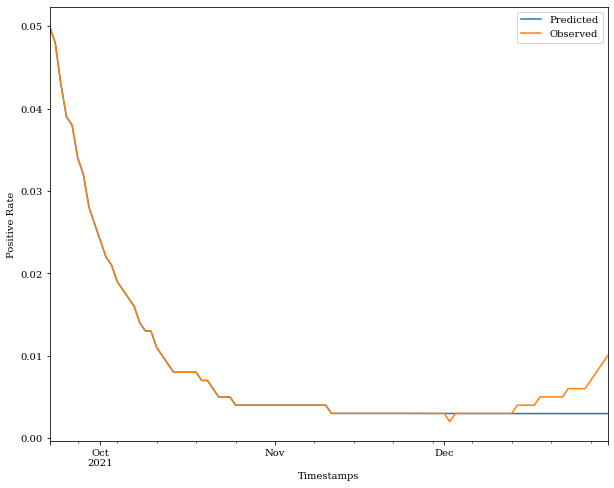

In [ ]:
### Generate graph
ax = df_plot.plot(figsize=(10,8), legend=True)
df_pred_plot.plot(ax=ax, figsize=(10,8), legend=True)
plt.xlabel('Timestamps')
plt.ylabel('Positive Rate')
plt.legend(['Predicted','Observed'])
#plt.title('Positive Rate, ARIMA(1,1,1), 40Days')
#plt.savefig('ARIMA(2,1,2)_40Days.png', dpi=100)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(df_pred, test40['Positive\_Rate']))
print(rmse)

0.002174115095499034


## 80 Days

In [ ]:
train80 = df.iloc[:-80]
test80 = df.iloc[-80:]
model = ARIMA(train80['Positive\_Rate'], order = (2, 1, 2))
model = model.fit()

In [ ]:
start = len(train80)
end  = len(df)
pred = model.predict(start=start, end=end-1, typ='levels')
pred.index = df.index[start:end+1]
df_pred = pd.DataFrame(pred)
df_pred = df_pred.rename(columns={'predicted_mean': 'Positive\_Rate'})

In [ ]:
df_plot = df[df.columns[0]]
df_pred_prev = pd.DataFrame(df_plot[-100:-80])
df_plot = pd.DataFrame(df_plot[-100:])
df_pred_plot = pd.concat([df_pred_prev, df_pred])

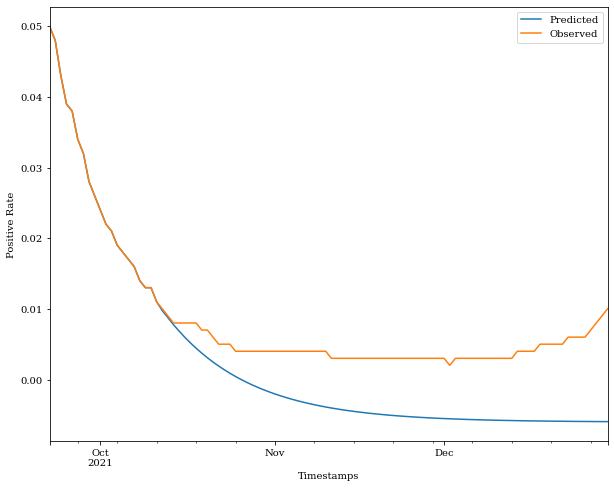

In [ ]:
### Generate graph
ax = df_pred_plot.plot(figsize=(10,8), legend=True)
df_plot.plot(ax=ax, figsize=(10,8), legend=True)
plt.xlabel('Timestamps')
plt.ylabel('Positive Rate')
plt.legend(['Predicted','Observed'])
#plt.title('Positive Rate, ARIMA(1,1,1), 40Days')
#plt.savefig('ARIMA(2,1,2)_80Days.png', dpi=100)

In [ ]:
rmse = sqrt(mean_squared_error(df_pred, test80['Positive\_Rate']))
print(rmse)

0.008198170477130026


## 20 Days

In [ ]:
train20 = df.iloc[:-20]
test20 = df.iloc[-20:]
model = ARIMA(train20['Positive\_Rate'], order = (2, 1, 2))
model = model.fit()

In [ ]:
start = len(train20)
end  = len(df)
pred = model.predict(start=start, end=end-1, typ='levels')
pred.index = df.index[start:end+1]
df_pred = pd.DataFrame(pred)
df_pred = df_pred.rename(columns={'predicted_mean': 'Positive\_Rate'})

In [ ]:
df_plot = df[df.columns[0]]
df_pred_prev = pd.DataFrame(df_plot[-100:-20])
df_plot = pd.DataFrame(df_plot[-100:])
df_pred_plot = pd.concat([df_pred_prev, df_pred])

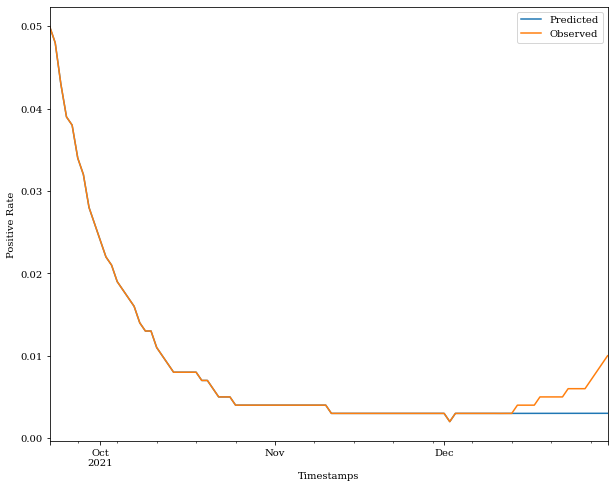

In [ ]:
### Generate graph
ax = df_pred_plot.plot(figsize=(10,8), legend=True)
df_plot.plot(ax=ax, figsize=(10,8), legend=True)
plt.xlabel('Timestamps')
plt.ylabel('Positive Rate')
plt.legend(['Predicted','Observed'])
#plt.title('Positive Rate, ARIMA(1,1,1), 40Days')
plt.savefig('ARIMA(2,1,2)_20Days.png', dpi=100)

In [ ]:
rmse = sqrt(mean_squared_error(df_pred, test20['Positive\_Rate']))
print(rmse)

0.0030431581541969757
